In [1]:
import healpy as hp
import numpy as np
from turn import turn
from rot import rot
from shift_SW import shift_SW
import os
import astropy.units as u
import matplotlib.pyplot as plt
#hp.disable_warnings()
%matplotlib inline

In [2]:
# Set empty array for pixel data
nside = 128
m = np.zeros(hp.nside2npix(nside))

# Set galactic plane
gal_width = 20 * u.deg
galaxy_plane_pixels = hp.query_strip(nside, np.pi/2 - gal_width.to_value(u.radian),
                                     np.pi/2+ gal_width.to_value(u.radian))
m[galaxy_plane_pixels] = 10

# Set galatic centre
source_vector = hp.ang2vec(theta=np.pi/2, phi=0)
galactic_center_pixels = hp.query_disc(nside, source_vector, radius=(5*u.deg).to_value(u.radian))
m[galactic_center_pixels] = 50
#np.where(m ==50)

0.0 180.0 -180.0 180.0


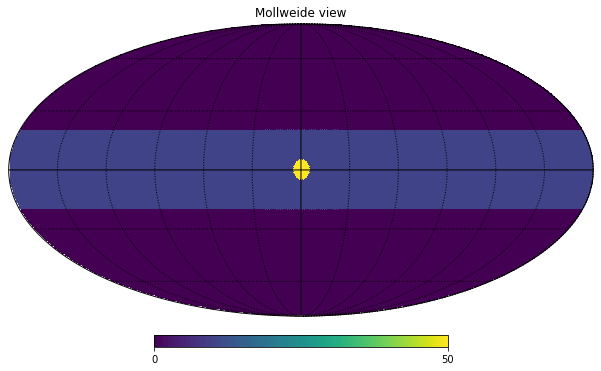

In [3]:
# Visualise map
hp.mollview(m,max = None)
m_smoothed = hp.smoothing(m, fwhm=(5*u.deg).to_value(u.radian))
#hp.mollview(m_smoothed ,title="Smoothed map")
#m_smoothed
hp.graticule();

0.0 180.0 -180.0 180.0


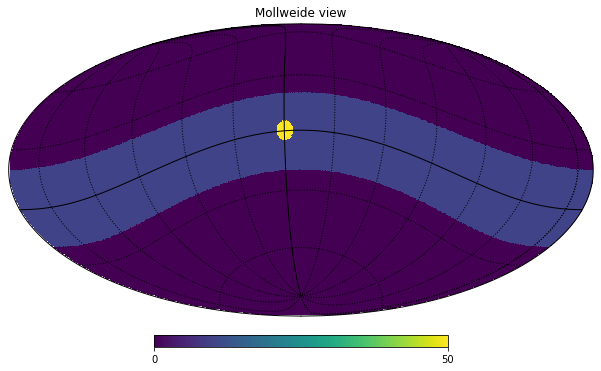

In [5]:
# Rotate map based on view
hp.mollview(m, rot=[-10, -20])
hp.graticule();

In [6]:
# Create custom rotator, sets input longitude and latitude as new center
longitude = 45 * u.deg
latitude = 45 * u.deg
rot_custom = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)], inv = True)  # Apparently, more accurate to use opposite centre and invert
#rot_custom(0,0, lonlat=True)

0.0 180.0 -180.0 180.0


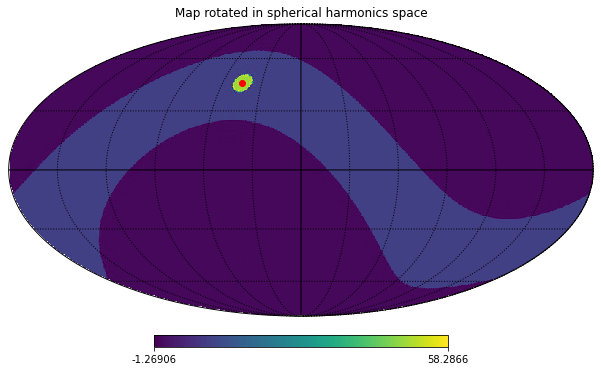

In [7]:
# Test .rotate_map_alms
test_rotated_alms = rot_custom.rotate_map_alms(m)
hp.mollview(test_rotated_alms, title="Map rotated in spherical harmonics space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_alms)


0.0 180.0 -180.0 180.0


[0. 0. 0. ... 0. 0. 0.]


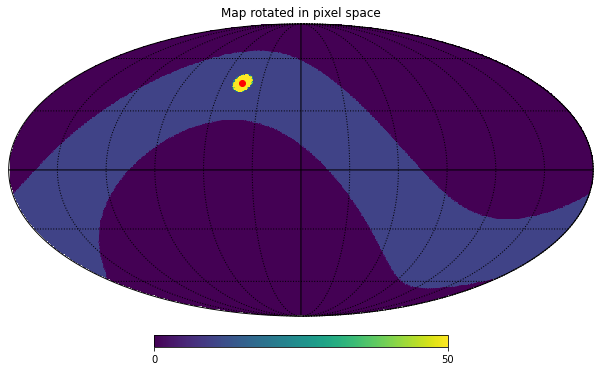

In [8]:
# Test .rotate_map_pixel
test_rotated_pixel = rot_custom.rotate_map_pixel(m)
hp.mollview(test_rotated_pixel, title="Map rotated in pixel space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
print(test_rotated_pixel)

0.0 180.0 -180.0 180.0


[0. 0. 0. ... 0. 0. 0.]


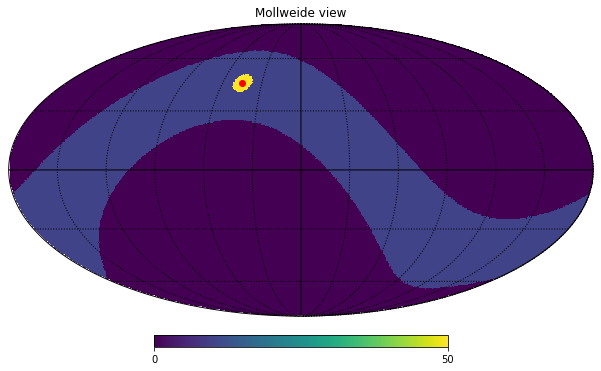

In [9]:
# Test previous rotate function
test_rotated_euler = rot(nside,m,[45,45,0])
hp.mollview(test_rotated_euler)
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
print(test_rotated_euler)

Text(0.5, 1.0, 'Rotated Euler')

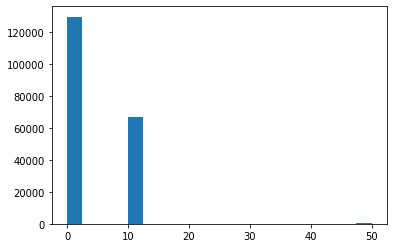

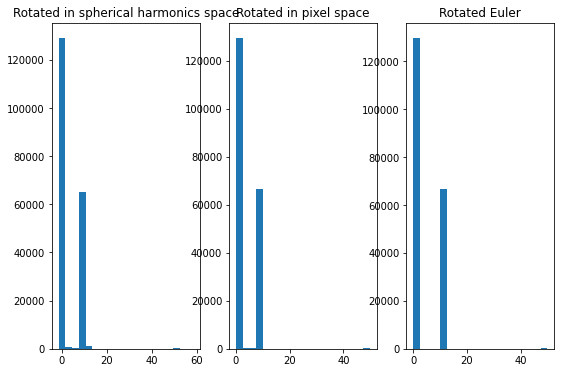

In [10]:
# Comparisons

plt.hist(m, bins = 20)
fig, axis = plt.subplots(1,3,figsize=(9,6))
axis[0].hist(test_rotated_alms, bins = 20)
axis[0].set_title("Rotated in spherical harmonics space")
axis[1].hist(test_rotated_pixel, bins = 20)
axis[1].set_title("Rotated in pixel space")
axis[2].hist(test_rotated_euler, bins = 20)
axis[2].set_title("Rotated Euler")


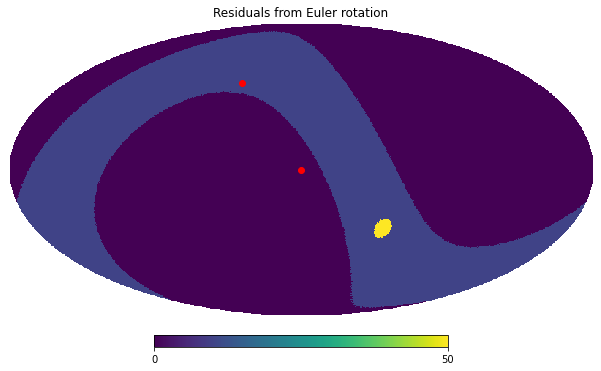

In [11]:
# Residuals
# rot_custom_back = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)])
# residual_alms = m - rot_custom_back.rotate_map_alms(test_rotated_alms)
# residual_pixel = m - rot_custom_back.rotate_map_pixel(test_rotated_pixel)
# residual_euler = m - rot(nside,test_rotated_euler,[-50,-50,0])

# hp.mollview(residual_alms, title="Residuals from spherical harmonics rotation")
#hp.mollview(residual_pixel, title="Residuals from pixel rotation")
#hp.mollview(rot_custom_back.rotate_map_pixel(test_rotated_pixel))
#hp.mollview(rot(nside,test_rotated_euler,[-90,-90,0]), title="Residuals from Euler rotation")
hp.projplot(0,0, 'ro', lonlat=True)
hp.projplot(45,45, 'ro', lonlat=True)

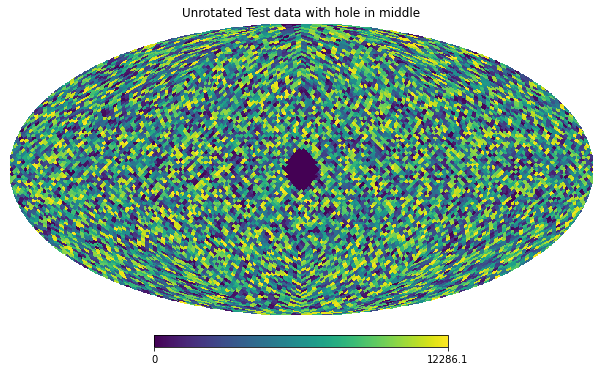

In [12]:
# Set random test data
nside = 32
npix = hp.nside2npix(nside)
test_pixels= np.random.uniform(0,npix-1,npix)
source_vector = hp.ang2vec(theta=np.pi/2, phi=0)

# Set galactic centre
galactic_center_pixels = hp.query_disc(nside, source_vector, radius=(10*u.deg).to_value(u.radian))
test_pixels[galactic_center_pixels] = 0

# Visualise map
hp.mollview(test_pixels, title = "Unrotated Test data with hole in middle")



(array([1282., 1191., 1251., 1209., 1154., 1224., 1200., 1281., 1260.,
        1236.]),
 array([    0.        ,  1228.61390452,  2457.22780903,  3685.84171355,
         4914.45561806,  6143.06952258,  7371.68342709,  8600.29733161,
         9828.91123613, 11057.52514064, 12286.13904516]),
 <BarContainer object of 10 artists>)

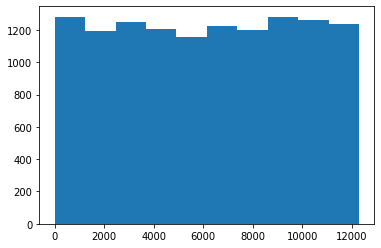

In [13]:
plt.hist(test_pixels)

0.0 180.0 -180.0 180.0


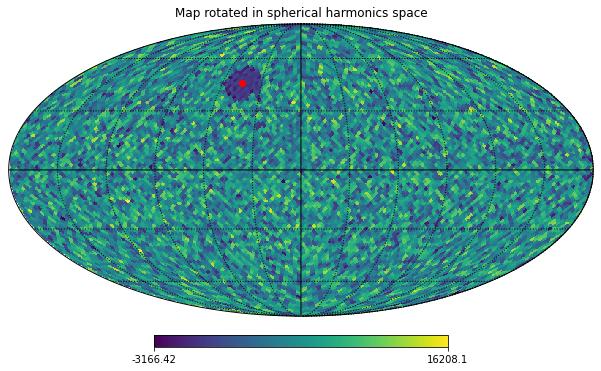

In [14]:
# Test .rotate_map_alms
test_rotated_alms = rot_custom.rotate_map_alms(test_pixels)
hp.mollview(test_rotated_alms, title="Map rotated in spherical harmonics space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_alms)


(array([1282., 1191., 1251., 1209., 1154., 1224., 1200., 1281., 1260.,
        1236.]),
 array([    0.        ,  1228.61390452,  2457.22780903,  3685.84171355,
         4914.45561806,  6143.06952258,  7371.68342709,  8600.29733161,
         9828.91123613, 11057.52514064, 12286.13904516]),
 <BarContainer object of 10 artists>)

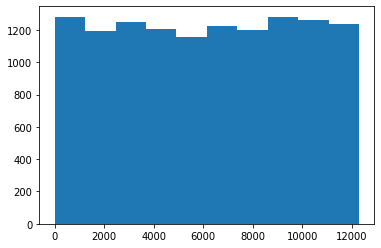

In [15]:
plt.hist(test_pixels)

0.0 180.0 -180.0 180.0


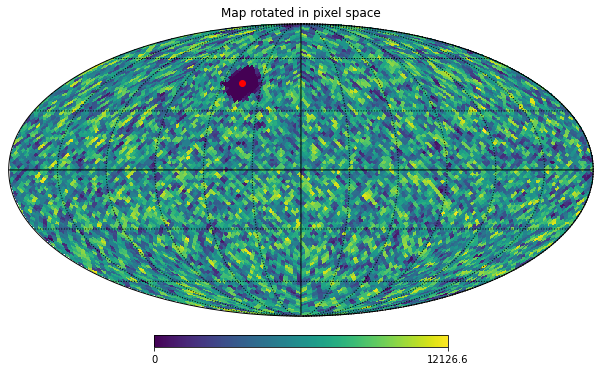

In [16]:
# Test .rotate_map_pixel
test_rotated_pixel = rot_custom.rotate_map_pixel(test_pixels)
hp.mollview(test_rotated_pixel, title="Map rotated in pixel space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_pixel)

0.0 180.0 -180.0 180.0


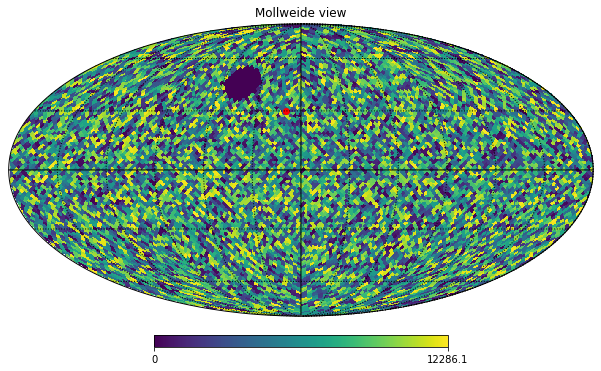

In [17]:
# Test previous rotate function
test_rotated_euler = rot(nside,test_pixels,[45,45,0])
hp.mollview(test_rotated_euler)
hp.projplot(10,30, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_euler)

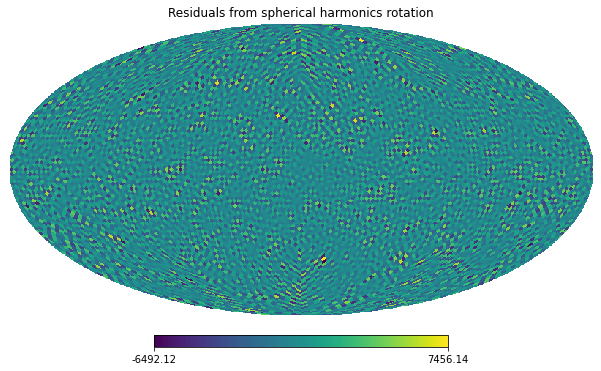

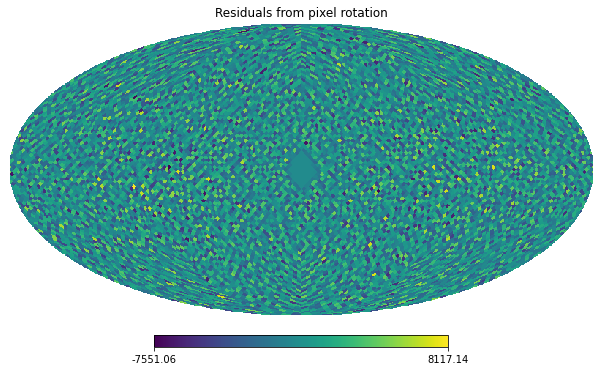

In [18]:
# Residuals
rot_custom_back = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)])
residual_alms = rot_custom_back.rotate_map_alms(test_rotated_alms)
residual_pixel = rot_custom_back.rotate_map_pixel(test_rotated_pixel)
residual_euler = test_pixels - rot(nside,test_rotated_euler,[-45,-45,0])

hp.mollview(test_pixels-residual_alms, title="Residuals from spherical harmonics rotation")
hp.mollview(test_pixels-residual_pixel, title="Residuals from pixel rotation")
#hp.mollview(rot_custom_back.rotate_map_pixel(test_rotated_pixel))
# hp.mollview(rot(nside,test_rotated_euler,[-90,-90,0]), title="Residuals from Euler rotation")
# hp.projplot(0,0, 'ro', lonlat=True)
# hp.projplot(45,45, 'ro', lonlat=True)

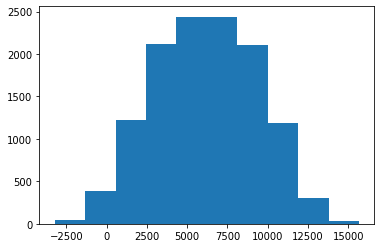

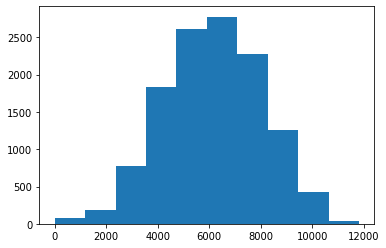

In [19]:
plt.hist(residual_alms)
plt.show()
plt.hist(residual_pixel)
plt.show()

In [20]:
#shift = shift_SW(nside,m)

#hp.mollview(shift, title = "Shift 1 pixel SW")
#np.where(shift ==50)
